In [16]:
import linear_regression_for_NI as ni
reload(ni)
import corrlab 
reload(corrlab)
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

In [2]:
train_start, train_end = '20171113', '20171113'
test_start, test_end = '20171114', '20171114'
period, lag, target = '5s', '5s', 'ru0'
type = 1

In [3]:
rs = ni.simu(train_start, train_end,test_start, test_end, period, lag, target, type = type)

In [4]:
train, test = rs.get_train_test()

/home/hui/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/hui/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
shifted_train, shifted_test = rs.shift(train, test)
sampled_train, sampled_test = rs.sample(shifted_train, shifted_test)

In [6]:
only_sampled_train, only_sampled_test = rs.sample(train, test)

In [51]:
use_sym = sampled_train.corr()[target][abs(sampled_train.corr()[target]) > 0.5 ].index.values

In [52]:
use_sym = list(use_sym)
use_sym.remove(target)

In [46]:
from sklearn.linear_model import Ridge, RidgeCV
clf = RidgeCV(alphas = np.arange(0.01,5,0.01), normalize = True)
clf.fit(sampled_train[use_sym], sampled_train[target])
print clf.alpha_
print 'coef:', clf.coef_
clf = Ridge(alpha = clf.alpha_,normalize=True,max_iter=5000)
clf.fit(sampled_train[use_sym], sampled_train[target])
print 'train score:',clf.score(sampled_train[use_sym], sampled_train[target])

 0.01
coef: [ 1.19166597 -0.14880466 -0.10972799  0.18704791 -0.85334305 -0.21172889
 -0.45487582 -3.20336746  1.06555069 -0.49282156 -0.25060931  1.31706665
  0.07124774  0.29168987  0.47932859]
train score: 0.895232324402


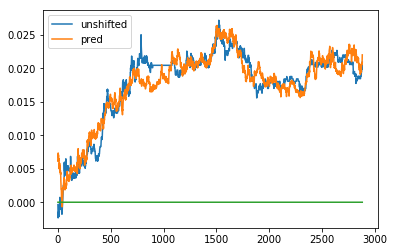

In [56]:
train_pred = clf.predict(sampled_train[use_sym])
rs.contrast(train_pred, sampled_train[target].values,start=0,end=3000)

In [17]:
pred_df = pd.DataFrame(train_pred)

In [19]:
pred_df['rolling'] = pred_df - pred_df.shift(1)

In [23]:
train_df=pd.DataFrame(sampled_train[target])
train_df['rolling'] = train_df - train_df.shift(1)

In [37]:
rolling_only_sampled = only_sampled_train[target]
rolling_only_sampled['rolling'] = rolling_only_sampled - rolling_only_sampled.shift(1)
rolling_only_sampled.fillna(method = 'bfill', inplace=True)

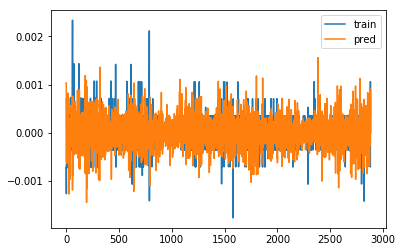

In [33]:
train_df.fillna(method='bfill',inplace=True)
pred_df.fillna(method = 'bfill',inplace=True)
plt.plot(train_df['rolling'].values,label = 'train')
plt.plot(pred_df['rolling'].values, label = 'pred')
plt.legend()
plt.show()

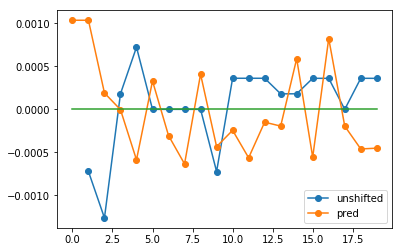

In [39]:
rs.contrast(pred_df['rolling'].values, rolling_only_sampled['rolling'].values, start=0,end=20)

In [55]:
sampled_train.shape

(2882, 39)